In [6]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('web.csv')

In [3]:
df.dtypes

,0
Source / Medium,object
Year,int64
Month of the year,int64
Users,int64
New Users,int64
Sessions,int64
Bounce Rate,float64
Pageviews,int64
Avg. Session Duration,object
Conversion Rate (%),float64


In [4]:
df.describe()

,Year,Month of the year,Users,New Users,Sessions,Bounce Rate,Pageviews,Conversion Rate (%),Transactions,Revenue,Quantity Sold
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2019.642570,6.546185,11340.522088,8778.967871,16155.417671,0.492651,44287.710843,3.150602,85.393574,14832.104418,150.706827
std,0.480208,3.513636,24555.407501,20618.100558,35672.225385,0.202768,94040.501564,8.138685,178.167978,29800.642723,328.732252
min,2019.000000,1.000000,41.000000,1.000000,127.000000,0.000000,237.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,4.000000,318.000000,145.000000,399.000000,0.350000,1388.000000,0.140000,2.000000,224.000000,2.000000
50%,2020.000000,6.000000,865.000000,493.000000,1146.000000,0.530000,4457.000000,0.420000,8.000000,1416.000000,14.000000
75%,2020.000000,10.000000,7869.000000,3721.000000,10252.000000,0.620000,31980.000000,0.780000,84.000000,14964.000000,129.000000
max,2020.000000,12.000000,126870.000000,104308.000000,194667.000000,0.990000,559509.000000,42.080000,1347.000000,203552.000000,2402.000000


In [11]:
df['Month of the year'].dtypes

dtype('int64')

In [12]:
df['Conversion Rate (%)'].dtype

dtype('float64')

In [13]:
df['Conversion Rate (%)'] = df['Conversion Rate (%)']/100 #Get percent out of value.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Source / Medium        249 non-null    object 
 1   Year                   249 non-null    int64  
 2   Month of the year      249 non-null    int64  
 3   Users                  249 non-null    int64  
 4   New Users              249 non-null    int64  
 5   Sessions               249 non-null    int64  
 6   Bounce Rate            249 non-null    float64
 7   Pageviews              249 non-null    int64  
 8   Avg. Session Duration  249 non-null    object 
 9   Conversion Rate (%)    249 non-null    float64
 10  Transactions           249 non-null    int64  
 11  Revenue                249 non-null    int64  
 12  Quantity Sold          249 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 25.4+ KB
None


In [15]:
for col in ['Source / Medium']:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('category')


In [16]:
#1.total revenue , users and sessions by source / medium
grouped_data = df.groupby('Source / Medium')[['Revenue','Users','Sessions']].sum()
print(grouped_data)

                 Revenue    Users  Sessions
Source / Medium                            
A                1294136  1110513   1702468
AA                    81     2697      3012
B                 540692   696901    840512
BB                   103      382      1133
C                 207764   255043    368662
CC                 24440     1333      1765
D                    290   107241    127386
DD                  1307      320       503
E                 197904   185065    328563
EE                 14257      620      1138
F                 149046   142865    173986
FF                  1548     1213      1455
G                  84647    53214     86987
GG                     0      216       219
H                  15067    71565     97793
HH                   439       81       215
I                  54376    54565     91971
II                   450      102       214
J                   4009    11112     11702
JJ                  3880      610       763
K                   5021    2205

<ipython-input-16-6167dff20314>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('Source / Medium')[['Revenue','Users','Sessions']].sum()


In [17]:
# 2. Average Bounce Rate and Conversion Rate by Source / Medium
grouped_data = df.groupby('Source / Medium')[['Bounce Rate','Conversion Rate (%)']].mean()
print(grouped_data)

                 Bounce Rate  Conversion Rate (%)
Source / Medium                                  
A                   0.669167             0.004567
AA                  0.578889             0.000622
B                   0.570833             0.003617
BB                  0.653333             0.000467
C                   0.512500             0.003808
CC                  0.336000             0.065300
D                   0.860000             0.000020
DD                  0.410000             0.017900
E                   0.572727             0.003936
EE                  0.311667             0.056217
F                   0.572500             0.005883
FF                  0.453750             0.006125
G                   0.560000             0.007350
GG                  0.990000             0.000000
H                   0.624000             0.000740
HH                  0.260000             0.014000
I                   0.475556             0.009500
II                  0.420000             0.014000


<ipython-input-17-6cec94546b58>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('Source / Medium')[['Bounce Rate','Conversion Rate (%)']].mean()


In [19]:
#monthly trends
monthly_trends = df.groupby('Month of the year')[['Revenue','Users','Sessions']].sum()
print(monthly_trends)

                   Revenue   Users  Sessions
Month of the year                           
1                   307336  225887    321569
2                   323540  208961    299524
3                   277426  179824    262298
4                   373345  193983    274912
5                   589545  396757    547913
6                   469650  243672    359041
7                   266165  205556    273979
8                   115788  119359    153935
9                   155796  217509    326626
10                  283905  280312    408582
11                  270010  288385    424084
12                  260688  263585    370236


<ipython-input-23-f88e358af781>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_source_medium = df.groupby('Source / Medium')['Revenue'].sum()


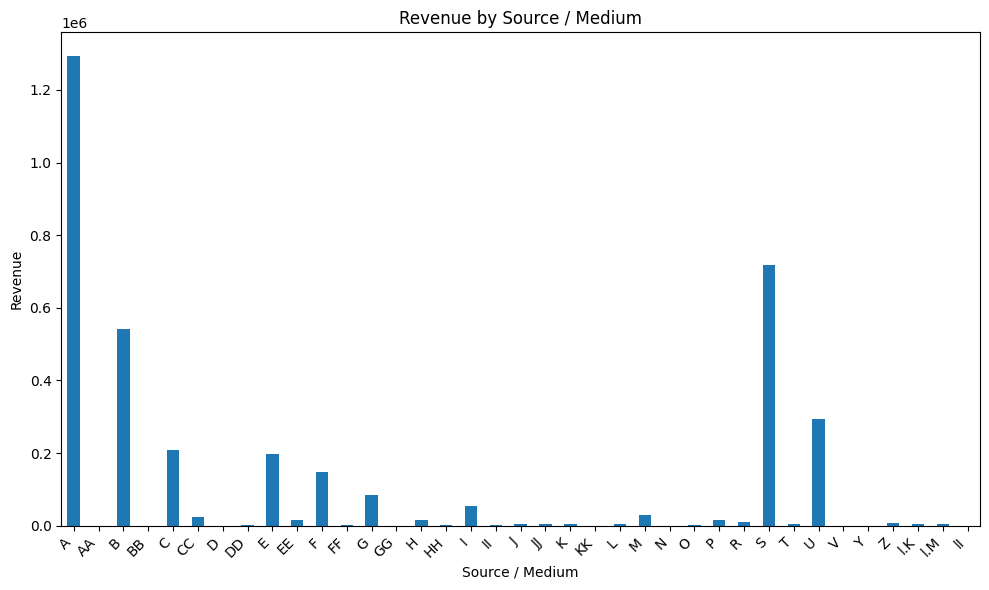

In [23]:
# 1. Revenue by Source / Medium (Bar Chart)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
revenue_by_source_medium = df.groupby('Source / Medium')['Revenue'].sum()
revenue_by_source_medium.plot(kind='bar')
plt.title('Revenue by Source / Medium')
plt.xlabel('Source / Medium')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='Month of the year'>

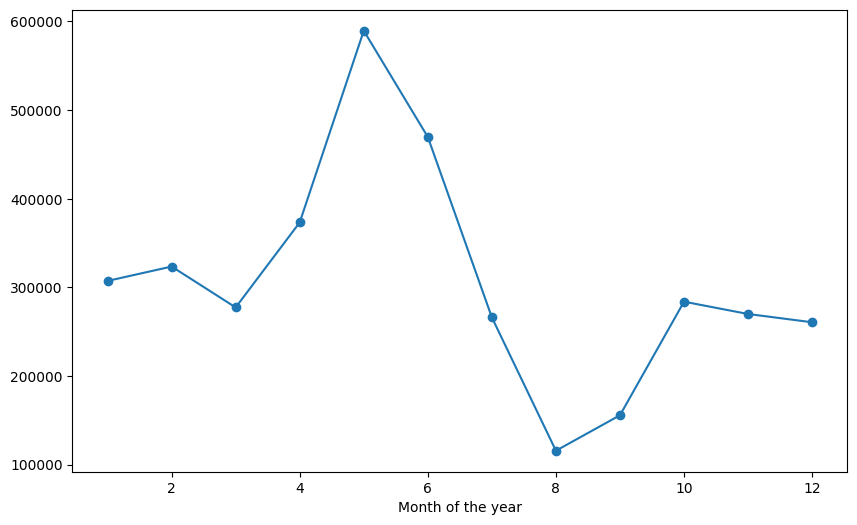

In [24]:
#monthly revenue trend line chart
plt.figure(figsize=(10, 6))
monthly_revenue_trend = df.groupby('Month of the year')['Revenue'].sum()
monthly_revenue_trend.plot(kind='line', marker='o')



<ipython-input-25-cddb48759710>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bounce_rate_by_source_medium = df.groupby('Source / Medium')['Bounce Rate'].mean()


<Axes: xlabel='Source / Medium'>

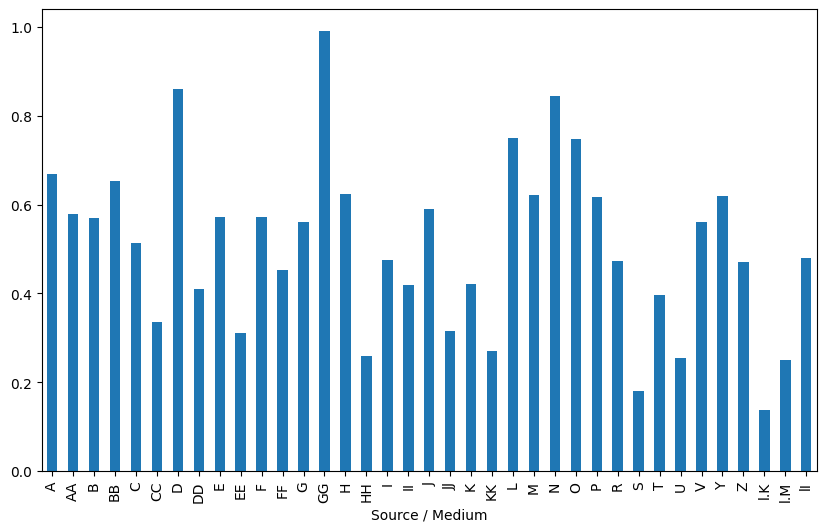

In [25]:
# 3. Average Bounce Rate by Source / Medium (Bar Chart)
plt.figure(figsize=(10, 6))
average_bounce_rate_by_source_medium = df.groupby('Source / Medium')['Bounce Rate'].mean()
average_bounce_rate_by_source_medium.plot(kind='bar')

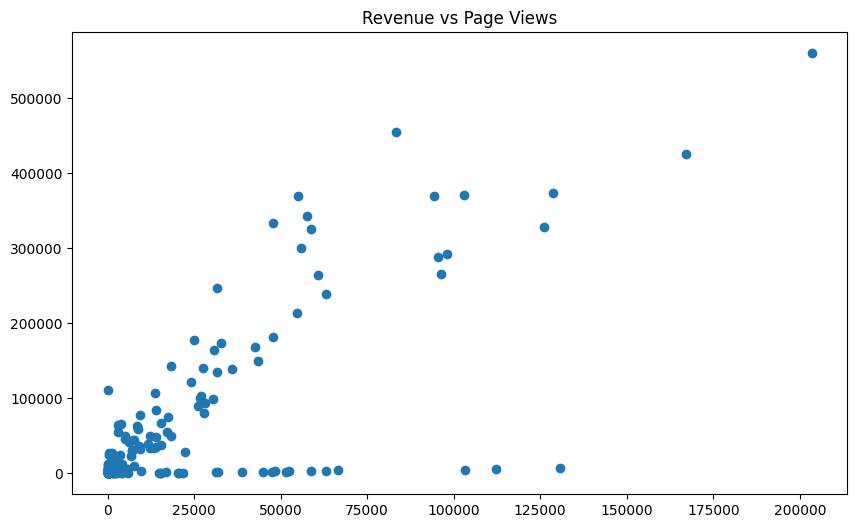

In [26]:
# 4. Scatter plot of Revenue vs Page views

plt.figure(figsize=(10,6))
plt.scatter(x = df["Revenue"], y = df["Pageviews"])
plt.title("Revenue vs Page Views")
plt.show()